In [1]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

import mlflow
import mlflow.sklearn

import matplotlib.pyplot as plt

In [18]:
expName = "Housing Experiment"
mlflow.create_experiment(name=expName)

SyntaxError: invalid syntax (<ipython-input-18-c30de59332d2>, line 1)

In [2]:
data = pd.read_csv("C:\\Users\\MaryWillcock\\Documents\\GitHub\\MLFlow_Tutorial\\Housing_train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
cols = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
data = data[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']].copy()

data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
# missing data
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
    print(missing_data.head(10))

In [6]:
missing_data(data)

              total   percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
MasVnrArea        8  0.005479
BsmtFinSF1        0  0.000000
LowQualFinSF      0  0.000000
2ndFlrSF          0  0.000000
1stFlrSF          0  0.000000
TotalBsmtSF       0  0.000000
BsmtUnfSF         0  0.000000
BsmtFinSF2        0  0.000000


In [7]:
data = data.fillna(data.mean())
missing_data(data)

              total  percent
SalePrice         0      0.0
BsmtFinSF1        0      0.0
GrLivArea         0      0.0
LowQualFinSF      0      0.0
2ndFlrSF          0      0.0
1stFlrSF          0      0.0
TotalBsmtSF       0      0.0
BsmtUnfSF         0      0.0
BsmtFinSF2        0      0.0
MasVnrArea        0      0.0


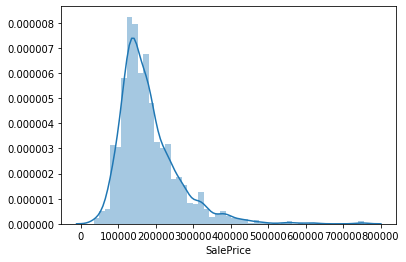

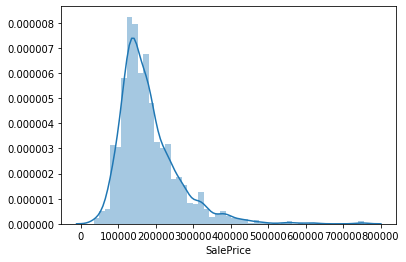

In [8]:
import seaborn as sns
fig, ax = plt.subplots()
#histogram
sns.distplot(data['SalePrice'])
plt.savefig('SalesHist.png')
display(fig)

In [9]:
# Split the data into training and test sets. (0.75, 0.25) split.
train, test = train_test_split(data)

# The predicted column is "SalePrice"
train_x = train.drop(["SalePrice"], axis=1)
test_x = test.drop(["SalePrice"], axis=1)
train_y = train[["SalePrice"]]
test_y = test[["SalePrice"]]

In [19]:
def train(in_alpha, in_l1_ratio, tag):
    warnings.filterwarnings("ignore")
    np.random.seed(40)
    
    def eval_metrics(actual, pred):
        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        return rmse, mae, r2
    
    #Split test and train, then pickle data to later save as artifact 
    
    data.to_pickle('data.pkl')
        
    # Set default values if no alpha is provided
    if float(in_alpha) is None:
        alpha = 0.5
    else:
        alpha = float(in_alpha)
    
    # Set default values if no l1_ratio is provided
    if float(in_l1_ratio) is None:
        l1_ratio = 0.5
    else:
        l1_ratio = float(in_l1_ratio)   

    with mlflow.start_run(run_name='TEST',experiment_id=1):
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

        predicted_qualities = lr.predict(test_x)
   
        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

        print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        mlflow.sklearn.log_model(lr, "model")
        mlflow.set_tag('Feature Engineering', tag )
        mlflow.log_artifact('data.pkl')
        mlflow.log_artifact('SalesHist.png')
        
        print("Model saved in run %s" % mlflow.active_run().info.run_uuid)
        mlflow.end_run(status='FINISHED')
    mlflow.end_run(status='FINISHED')

In [20]:
tag = "Base Data"
train(0.07, 0.02, tag)

Elasticnet model (alpha=0.070000, l1_ratio=0.020000):
  RMSE: 30848.65809067943
  MAE: 20358.767285206555
  R2: 0.8329664482598956
Model saved in run e4ee23d219124d4899e893dfaa56c794
